# Let's do some quick python!

In [1]:
print('hello world')

hello world


Task: print your name

In [2]:
# For loops are easier done than said
for i in range(5):
    print(i)

0
1
2
3
4


In [3]:
for i in range(5):
    if i>2:
        print('bigger than 3')

bigger than 3
bigger than 3


Task: add up all odd numbers up to 20. hint: % is the reminder operation

In [4]:
foo = (1,2,3,4,5)
bar = []
for i in foo:
    bar.append(i)
    
print(bar)

[1, 2, 3, 4, 5]


But really, usually we should be using numpy

In [3]:
# Most python programs use outside packages
# Use 'import' to load in packages already in your python environment
import numpy as np

In [6]:
foo = np.array(foo)

In [7]:
# Python errors are (usually) descriptive and somewhat helpful
bar+1

TypeError: can only concatenate list (not "int") to list

In [8]:
# Let's try that again with a numpy array
foo+1

array([2, 3, 4, 5, 6])

In [9]:
# Array 'slicing' is a powerful tool
foo[2:]

array([3, 4, 5])

In [10]:
foo[:-1]

array([1, 2, 3, 4])

In [11]:
foo[::2]

array([1, 3, 5])

In [12]:
foo[::-1]

array([5, 4, 3, 2, 1])

In [13]:
# Package member functions can be accessed by using a .
np.sum(foo)

15

In [15]:
np.average(foo)

3.0

In [16]:
data = np.random.normal(0,123,10000)

You can do a bunch of stuff just with numpy functions and numpy arrays without forloops. It is SO much faster than forloops.

Task: google how to take the standard deviation of data

Now let's make some plots

In [2]:
import matplotlib.pyplot as plt

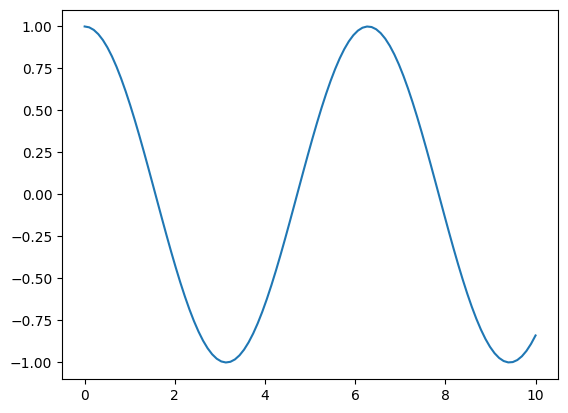

In [19]:
# Linspace is a helpful function for generating linear arrays
x = np.linspace(0,10,100)

plt.plot(x, np.cos(x))
plt.show()

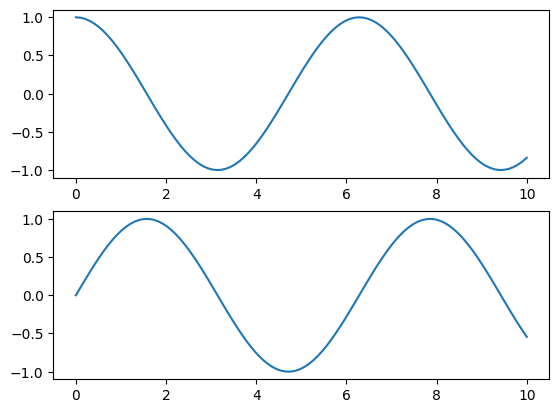

In [20]:
# Subplots are useful for related graphs which need their own axes
fig, ax = plt.subplots(2,1)

# Note that we are plotting from the AXIS object, not the figure
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))
plt.show()

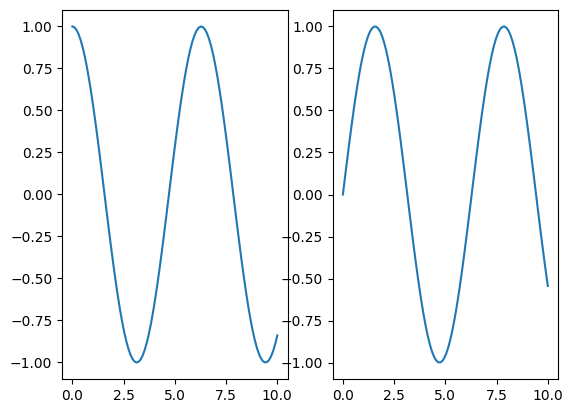

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))

# This member function is useful for outputting plots in the file format of your choosing
plt.savefig("test_sinwave.pdf")
plt.show()

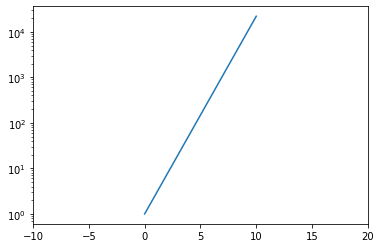

In [52]:
# A reminder that numpy is your friend when it comes to specific member functions
plt.plot(x, np.exp(x))

# Let's adjust some parameters to better display exponential data
plt.yscale('log')
plt.xlim((-10,20))
plt.show()

Task: Make 2 subplots. One with $x^5$ with x and y scales both logscales and y limits from 0 to 10000. Second with $\log(x)$ and figure out how to make the line look straight.

Now some scipy. There are SO many features, but we're going to just showcase some linear algebra and interpolation

In [24]:
import scipy

# If you don't want to load a package (for storage or runtime reasons), you can pick and choose
# You also don't have to use the . to access member functions
from scipy import linalg

In [25]:
mat = np.array(((3,2,15),(3,45,20),(19,23,5)))

# Lots of handy mathematical packages available for familiar operations
inv = scipy.linalg.inv(mat)
print(inv)

[[ 0.0199745  -0.02847429  0.05397365]
 [-0.03102422  0.02294943  0.00127497]
 [ 0.06680833  0.00263493 -0.01096473]]


In [26]:
# We can also use this handy built-in operation for matrix multiplication
mat@inv

array([[ 1.00000000e+00, -9.54097912e-18,  4.68375339e-17],
       [ 3.88578059e-16,  1.00000000e+00,  6.93889390e-18],
       [ 9.71445147e-17, -3.55618313e-17,  1.00000000e+00]])

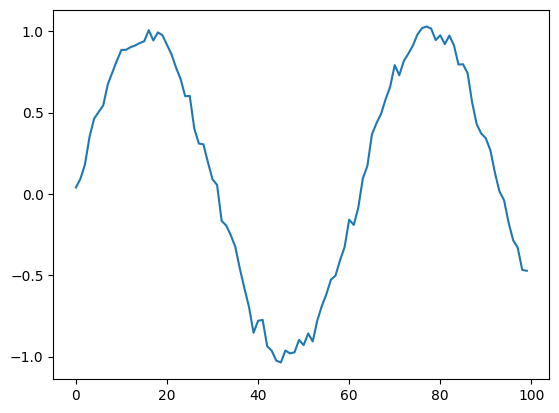

In [27]:
# Let's add some random noise to a sine wave for some later interpolation

# Note that we can run sin(x) here without issue... what x are we using?
data = np.sin(x) + np.random.normal(0,0.05, len(x))
plt.plot(data)
plt.show()

In [28]:
# You can name imports whatever you want! Just make sure your code is readable to others...
from scipy.interpolate import UnivariateSpline as interp

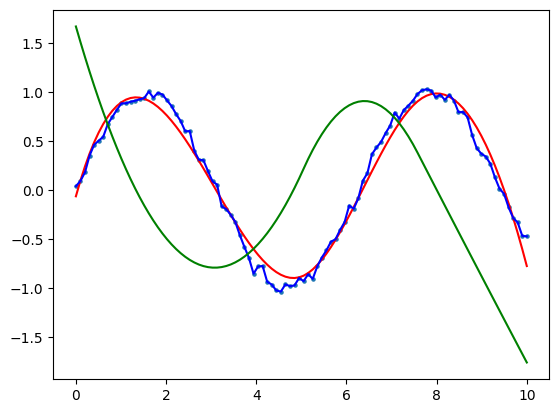

In [29]:
# We can interpolate data to get a better measure of the derivative 
intp1 = interp(x, data, s = 1)

# Scipy will calculate the derivative for us
deriv1 = intp1.derivative(1)

# What does s do here?
intp2 = interp(x, data, s = 0)

# Plot our results - let's specify a color so we can tell what is what
plt.scatter(x, data, s = 5)
plt.plot(x, intp1(x),'red')
plt.plot(x, intp2(x),'blue')
plt.plot(x, deriv1(x),'green')

plt.show()

Task: Play around with "smoothing"

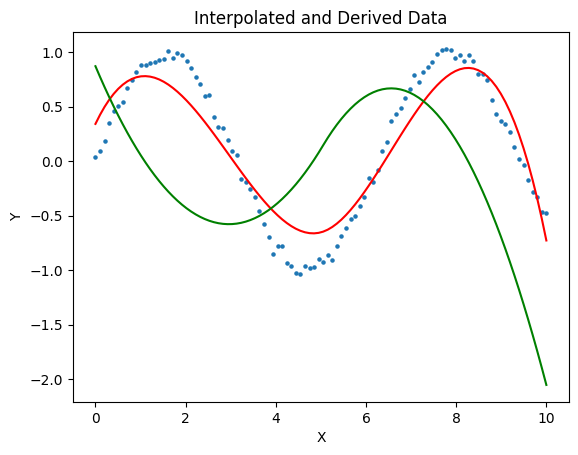

In [33]:
smoothing = 5
intp1 = interp(x, data, s = smoothing)
deriv1 = intp1.derivative(1)

# Matplotlib can produce multiple kinds of plots, usually through a member function
plt.scatter(x, data, s = 5)
plt.plot(x, intp1(x),'red')
plt.plot(x, deriv1(x),'green')

# Let's give our plot some labels to tidy things up a bit
plt.title('Interpolated and Derived Data')
plt.xlabel('X')
plt.ylabel('Y')


plt.show()

Task: create a fake dataset of $x^2$, interpolate, and take the derivative. Compare that with a fake dataset of $2x$ by plotting both

We're now going to learn a bit about the Pandas package, which is immensely useful for reading in and editing many types of data. We'll use Pandas to take a look at some real astronomical data and to make a figure!

In [1]:
# First, let's import the pandas package!

import pandas as pd

The first step we're going to need to take is actually importing the data. I have put some data in the GitHub repo from Gaia, a space telescope operated by the European Space Agency. The data is in a .csv format--a "comma separated values" file. As the name suggests, a .csv file is one in which the data are separated by commas (we call these separation characters "delimeters"). We can read in other types of data with pandas, too (ex. Excel files, Pickle files, etc.), but csv files are very commonly used (and not just in physics!).

We'll cover how to open and use some more subject-specific file types (ex. FITS files) in a later module.

In [4]:
# Read in the csv file using the read_csv function
# Save the data from the file as df--we'll cover why we're calling it that in a second
df = pd.read_csv('gaia_data_pandas.csv')

# Use the head function to preview the first five rows oof the data
df.head()

,source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp,logg_gspphot,teff_gspphot,mh_gspphot
0,2097561048396353920,280.089746,37.446305,0.327914,12.992434,1.195180,2.4344,4758.6084,-0.5639
1,2097599153346302592,280.376845,37.915974,0.654924,12.989189,1.153990,3.6778,5161.4634,-0.1426
2,2097612755501835264,280.034992,38.070525,1.218305,12.722566,0.552486,4.2021,6924.7870,-0.2459
3,2097613584436713600,280.190985,37.996071,1.514313,12.891989,0.964052,3.9211,5380.7180,-0.0795
4,2097641759421959552,279.398061,37.850850,1.442972,12.606302,0.778361,3.9782,5897.6920,-0.2232


Okay, so why did we call the data "df"--and why did the head function print out such a nice, clean looking table?

The answer to both of these questions is DataFrames! DataFrames are a Pandas-specific object type, and you can think of them almost like Numpy arrays + a LOT of extra functionality. For one, we have all of those nice column names, with which we can index columns of the DataFrame. Note that the column names here come straight from Gaia--I'll explain what some of them mean in a bit, but feel free to ask about them later if you are curious. We also have numerical indices for each of the rows that will allow us to index by row.

Let's look at an example of that:

In [5]:
# Index and print the 'ra' column of the DataFrame
# ra, or Right Ascension, is one of the on-sky (or celestial) coordinates that astronomers use.
print('The Right Ascension (RA) column of the DataFrame is:')
print(df['ra'])

print()
print()

# To index a row (or in this case, multiple rows) of the DataFrame, we'll need to use the loc function.
print('The second and third rows of the DataFrame:')
print(df.loc[[1,2]])

The Right Ascension (RA) column of the DataFrame is:
0         280.089746
1         280.376845
2         280.034992
3         280.190985
4         279.398061
             ...    
699995    168.942238
699996    169.275706
699997    169.190411
699998    168.861173
699999    169.067115
Name: ra, Length: 700000, dtype: float64


The second and third rows of the DataFrame:
             source_id          ra        dec  parallax  phot_g_mean_mag  \
1  2097599153346302592  280.376845  37.915974  0.654924        12.989189   
2  2097612755501835264  280.034992  38.070525  1.218305        12.722566   

      bp_rp  logg_gspphot  teff_gspphot  mh_gspphot  
1  1.153990        3.6778     5161.4634     -0.1426  
2  0.552486        4.2021     6924.7870     -0.2459  


Source ID refers to the unique number that the Gaia mission uses to identify each star that the telescope surveys. Because these are unique to each star, it might make sense to set the Gaia Source ID as the index that we use to identify rows of our DataFrame, so let's do that!

In [6]:
# Reset the index to the source_id column
df.set_index(keys = 'source_id', inplace = True)

# And let's take a look at the modified DataFrame.
df.head()

,ra,dec,parallax,phot_g_mean_mag,bp_rp,logg_gspphot,teff_gspphot,mh_gspphot
source_id,,,,,,,,
2097561048396353920,280.089746,37.446305,0.327914,12.992434,1.195180,2.4344,4758.6084,-0.5639
2097599153346302592,280.376845,37.915974,0.654924,12.989189,1.153990,3.6778,5161.4634,-0.1426
2097612755501835264,280.034992,38.070525,1.218305,12.722566,0.552486,4.2021,6924.7870,-0.2459
2097613584436713600,280.190985,37.996071,1.514313,12.891989,0.964052,3.9211,5380.7180,-0.0795
2097641759421959552,279.398061,37.850850,1.442972,12.606302,0.778361,3.9782,5897.6920,-0.2232


We can also add whole new columns to the DataFrame; let's give it a try with absolute magnitude. Absolute magnitude is a measure of how bright a star is, but the Gaia catalog only gives us apparent magnitude (the 'phot_g_mean_mag' column), which is also a function of distance. We can do a little math to use parallax to get distance, and then we can use that and phot_g_mean_mag to get absolute magnitude and add it to the DataFrame.

In [7]:
# Add a new column for absolute magnitude
# Calculate absolute magnitude from the phot_g_mean_mag and parallax columns of the DataFrame
# Note that we can do math with DataFrames just like with Numpy arrays
df['abs_mag'] = df['phot_g_mean_mag']+5*(1+np.log10(df['parallax']/1000))

# Don't worry about the warning message (though that's probably bad advice in general)...
# When working with real data, it's inevitable that we'll get some funny values (ex. NaNs),
# and the log10 function just can't process them.

# And let's take a look at the DataFrame again!
df.head()

/Users/sarahkane/miniconda3/envs/umap/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ra,dec,parallax,phot_g_mean_mag,bp_rp,logg_gspphot,teff_gspphot,mh_gspphot,abs_mag
source_id,,,,,,,,,
2097561048396353920,280.089746,37.446305,0.327914,12.992434,1.195180,2.4344,4758.6084,-0.5639,0.571233
2097599153346302592,280.376845,37.915974,0.654924,12.989189,1.153990,3.6778,5161.4634,-0.1426,2.070144
2097612755501835264,280.034992,38.070525,1.218305,12.722566,0.552486,4.2021,6924.7870,-0.2459,3.151347
2097613584436713600,280.190985,37.996071,1.514313,12.891989,0.964052,3.9211,5380.7180,-0.0795,3.793067
2097641759421959552,279.398061,37.850850,1.442972,12.606302,0.778361,3.9782,5897.6920,-0.2232,3.402591


We can also take a look at some nicely computed details about our data...

In [8]:
# Print out statistics on each of the columns in the DataFrame.
df.describe()

,ra,dec,parallax,phot_g_mean_mag,bp_rp,logg_gspphot,teff_gspphot,mh_gspphot,abs_mag
count,700000.000000,700000.000000,698085.000000,699997.000000,699933.000000,438434.000000,438434.000000,438434.000000,696046.000000
mean,190.205385,-16.907643,1.985653,11.986418,1.350084,3.459792,5626.925674,-0.250092,2.095767
std,97.714225,38.917024,3.720846,1.129495,0.866466,1.035736,1394.966627,0.373252,2.334695
min,0.000851,-89.711779,-7.908772,3.175233,-0.215045,-0.499800,3000.040300,-4.149900,-17.899375
25%,109.445122,-47.200190,0.474935,11.338479,0.825097,2.699500,4834.841050,-0.429000,0.535757
50%,192.403618,-21.585097,1.081410,12.181755,1.188556,3.932700,5497.138000,-0.209200,1.868930
75%,279.813788,9.165399,2.252918,12.797453,1.527756,4.239000,5993.916100,-0.039300,3.719212
max,359.998738,89.440939,336.026602,15.006116,7.715935,5.139900,37485.105000,0.800000,13.298385


There are a LOT of other things we can do with Pandas DataFrames. For instance, if we had another DatFrame with Gaia data, we could merge the two DataFrames such that rows with the same Source IDs (thus referring to the same stars) would be combined. We could sort the DataFrame by one of the columns, impose cuts on the data, and much more! When in doubt, Google "Pandas" + whatever you want to do with your data, and there is probably a way t

For now, we can now use this data to make a version of one of the most famous types of plots in astronomy--a Hertzsprung-Russel (H-R) Diagram! H-R Diagrams are plots of absolute magnitude versus color (which is 'bp_rp' in this data--Blue Photometry - Red Photometry).

We'll have to do a little modification or cleaning up of the data to get rid of NaN (missing) values before we can plot it. I am going to plot the H-R Diagram as a 2-D histogram because 1.) it is prettier than just a scatter plot, and 2.) it is more informative with regards to which parts of the H-R diagram are most populated in our sample.

There is so much more, like astropy for a bunch of astrophysics stuff and sklearn for a bunch of machine learning stuff. Go wild!